In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
#Load data and convert 'Winner' to a factor
data = pd.read_csv('stats_data2.csv')
factor = pd.factorize(data['Winner'])
data.Winner = factor[0]
definitions = factor[1]

data

,Home,Away,xG,xG.1,Home_GD90,Away_GD90,Home_Rank,Away_Rank,Winner
0,Burnley,Manchester City,0.3,1.9,-0.85,1.04,19,3,0
1,Arsenal,Nott'ham Forest,0.8,1.2,1.33,-0.24,1,17,1
2,Everton,Fulham,2.7,1.5,0.09,-0.39,16,12,0
3,Sheffield Utd,Crystal Palace,0.5,1.9,-1.14,-0.24,20,14,0
4,Brighton,Luton Town,4.0,1.5,0.24,-0.84,8,18,1
...,...,...,...,...,...,...,...,...,...
2552,Huddersfield,Arsenal,1.7,2.0,-0.45,0.54,16,6,0
2553,Newcastle Utd,Chelsea,2.2,1.0,-0.28,0.54,10,5,1
2554,Manchester Utd,Watford,0.4,0.6,0.40,-0.18,2,14,1
2555,Southampton,Manchester City,0.5,0.8,-0.14,1.44,17,1,0


In [29]:
#Changing 'Home' and 'Away' to 0's and 1's
#factor_home = pd.factorize(data['Home'])
#data.Home = factor_home[0]
#definitions_home = factor_home[1]

#factor_away = pd.factorize(data['Away'])
#data.Away = factor_away[0]
#definitions_away = factor_away[1]

data=data.drop(['Home','Away'], axis=1)
data

,xG,xG.1,Home_GD90,Away_GD90,Home_Rank,Away_Rank,Winner
0,0.3,1.9,-0.85,1.04,19,3,0
1,0.8,1.2,1.33,-0.24,1,17,1
2,2.7,1.5,0.09,-0.39,16,12,0
3,0.5,1.9,-1.14,-0.24,20,14,0
4,4.0,1.5,0.24,-0.84,8,18,1
...,...,...,...,...,...,...,...
2552,1.7,2.0,-0.45,0.54,16,6,0
2553,2.2,1.0,-0.28,0.54,10,5,1
2554,0.4,0.6,0.40,-0.18,2,14,1
2555,0.5,0.8,-0.14,1.44,17,1,0


In [30]:
#Split df into dependent/independent variables
X = data.drop('Winner', axis=1)
y = data['Winner']         


In [31]:
#Splitting data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)

In [32]:
#Model
model = RandomForestClassifier(criterion = 'gini')
model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
#Making predictions and checking accuracy score
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)


0.578125

In [10]:
#Display confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[103,  42,  19],
       [ 35, 168,  26],
       [ 44,  58,  17]])

In [34]:
#Tune hyperparameters using RandomizedSearchCV
params = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
         , 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = params, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]})

In [35]:
#Display best hyperparameters
best_rf = rand_search.best_estimator_


print('Best hyperparameters:',  rand_search.best_params_)
best_rf.get_params()

Best hyperparameters: {'n_estimators': 50, 'max_depth': 15}


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
#New model with best hyperparameters
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [37]:
#New model predictions and accuracy score
prediction2 = best_rf.predict(X_test)
accuracy_score(y_test, prediction2)

0.572265625

In [38]:
p2 = pd.Series(prediction2)
cm = confusion_matrix(y_test, p2)
cm
#Precision for Away Win: .665
#Home Win: .716
#Draw: .168

#Recall for Away Win: .577
#Home Win: .626
#Draw: .328

array([[109,  39,  16],
       [ 40, 164,  25],
       [ 40,  59,  20]])

In [27]:
pickle.dump(best_rf, open('best_rf.pkl', 'wb'))

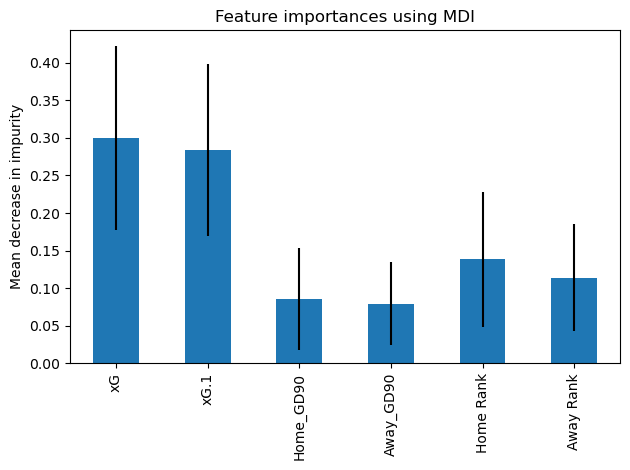

In [15]:
#Feature importance
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)

feature_names = ['xG', 'xG.1', 'Home_GD90', 'Away_GD90', 'Home Rank', 'Away Rank']
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [14]:
pred_data = pd.read_csv('preds.csv')
pred_data

,xG,xG.1,Home_GD90,Away_GD90,Home_Rank,Away_Rank
0,1.49,1.48,-0.20,0.14,6,16
1,1.42,0.79,-0.18,-1.10,13,20
2,1.19,1.38,-0.32,-0.47,10,12
3,1.12,1.13,-0.32,-0.80,14,18
4,1.91,1.39,1.37,0.07,3,15
5,1.65,1.81,0.44,0.09,4,5
6,1.14,0.94,-0.47,-0.83,7,19
7,1.72,0.95,0.26,-0.26,9,17
8,2.12,2.19,1.00,1.12,1,2
9,1.51,1.51,0.35,0.10,11,8


In [15]:
MW28 = best_rf.predict_proba(pred_data)
MW28 = pd.DataFrame(MW28, index=[0,1,2,3,4,5,6,7,8,9])
MW28['Game'] = ['United/Everton'
                , "B'mouth/Sheff"
                , 'Wolves/Fulham'
                , 'Palace/Luton'
                , 'Arsenal/Brentford'
                , 'Villa/Spurs'
                , 'WestHam/Burnley'
                , 'Brighton/Forest'
                , 'Liverpool/City'
                , 'Chelsea/Newcastle']

MW28 = MW28.rename({0:'Away Win', 1:'Home Win', 2:'Draw'}, axis=1)
MW28

,Away Win,Home Win,Draw,Game
0,0.216207,0.614225,0.169568,United/Everton
1,0.129023,0.628496,0.242480,B'mouth/Sheff
2,0.337062,0.357912,0.305026,Wolves/Fulham
3,0.254389,0.392159,0.353451,Palace/Luton
4,0.112205,0.742714,0.145081,Arsenal/Brentford
5,0.361598,0.436072,0.202331,Villa/Spurs
6,0.208111,0.480411,0.311478,WestHam/Burnley
7,0.164954,0.540472,0.294575,Brighton/Forest
8,0.415442,0.342576,0.241982,Liverpool/City
9,0.329984,0.351031,0.318986,Chelsea/Newcastle
